In [1]:
import re
from itertools import permutations
import numpy as np
import matplotlib.pyplot as plt
from networkx import nx

In [2]:
interaction_matrix = [[0,1,0,0,1],
                      [0,0,0,0,1],
                      [-1,0,0,0,0],
                      [-1,0,1,1,0],
                      [0,0,0,1,0]]

In [3]:
#obter todas os estados possiveis para o primeiro estado (s1), sem considerar restricoes
possibles_first_state = []

In [4]:
#permut elements in the list
def perm(list_to_permut):
    permuts = set(list(permutations(list_to_permut,len(list_to_permut))))
    for permut in permuts:
        possibles_first_state.append(permut)

In [5]:
all_zero = [0,0,0,0,0]
all_one = [1,1,1,1,1]
one_zero_four_one = [0,1,1,1,1]
one_one_four_zero = [1,0,0,0,0]
two_zero_three_one = [0,0,1,1,1]
two_one_three_zero = [1,1,0,0,0]
three_one_two_zero = [1,1,1,0,0]
three_zero_two_one = [0,0,0,1,1]
four_one_one_zero = [1,1,1,1,0]
four_zero_one_one = [0,0,0,0,1]

In [6]:
perm(all_zero)
perm(all_one)
perm(one_zero_four_one)
perm(one_one_four_zero)
perm(two_zero_three_one)
perm(two_one_three_zero)
perm(three_one_two_zero)
perm(three_zero_two_one)
perm(four_one_one_zero)
perm(four_zero_one_one)

In [7]:
possibles_first_state

[(0, 0, 0, 0, 0),
 (1, 1, 1, 1, 1),
 (1, 1, 1, 1, 0),
 (1, 1, 0, 1, 1),
 (1, 1, 1, 0, 1),
 (0, 1, 1, 1, 1),
 (1, 0, 1, 1, 1),
 (0, 0, 0, 1, 0),
 (0, 1, 0, 0, 0),
 (1, 0, 0, 0, 0),
 (0, 0, 0, 0, 1),
 (0, 0, 1, 0, 0),
 (1, 1, 0, 1, 0),
 (1, 1, 1, 0, 0),
 (0, 1, 0, 1, 1),
 (0, 1, 1, 0, 1),
 (1, 0, 0, 1, 1),
 (1, 0, 1, 0, 1),
 (0, 1, 1, 1, 0),
 (1, 0, 1, 1, 0),
 (0, 0, 1, 1, 1),
 (1, 1, 0, 0, 1),
 (0, 0, 1, 1, 0),
 (1, 1, 0, 0, 0),
 (0, 1, 0, 1, 0),
 (0, 0, 1, 0, 1),
 (0, 0, 0, 1, 1),
 (1, 0, 0, 1, 0),
 (0, 1, 1, 0, 0),
 (1, 0, 1, 0, 0),
 (0, 1, 0, 0, 1),
 (1, 0, 0, 0, 1),
 (1, 1, 1, 0, 0),
 (1, 1, 0, 1, 0),
 (0, 1, 1, 0, 1),
 (0, 1, 0, 1, 1),
 (1, 0, 1, 0, 1),
 (1, 0, 0, 1, 1),
 (0, 1, 1, 1, 0),
 (1, 0, 1, 1, 0),
 (0, 0, 1, 1, 1),
 (1, 1, 0, 0, 1),
 (0, 0, 1, 1, 0),
 (1, 0, 1, 0, 0),
 (1, 1, 0, 0, 0),
 (0, 0, 1, 0, 1),
 (0, 0, 0, 1, 1),
 (0, 1, 1, 0, 0),
 (0, 1, 0, 1, 0),
 (1, 0, 0, 1, 0),
 (0, 1, 0, 0, 1),
 (1, 0, 0, 0, 1),
 (1, 1, 1, 1, 0),
 (1, 1, 1, 0, 1),
 (1, 1, 0, 1, 1),
 (0, 1, 1,

In [8]:
#Há 32 possibilidades para o primeiro estado
len(possibles_first_state)

62

In [9]:
#remove duplicates
possibles_first_state = list(dict.fromkeys(possibles_first_state))
len(possibles_first_state)

32

In [10]:
#calc the next input for each state
#dicionario para armazenar o proximo estado de determinado estado
next_input_for_each_state= {}

In [11]:
for state in possibles_first_state:
    state_to_transpose = [state]
    state_transposed = np.array(state_to_transpose).T
    next_input = np.matmul(interaction_matrix, state_transposed)
    next_input_for_each_state[state] = next_input

In [12]:
for state, next_input in next_input_for_each_state.items():
    print (state , ':', next_input)

(0, 0, 0, 0, 0) : [[0]
 [0]
 [0]
 [0]
 [0]]
(1, 1, 1, 1, 1) : [[ 2]
 [ 1]
 [-1]
 [ 1]
 [ 1]]
(1, 1, 1, 1, 0) : [[ 1]
 [ 0]
 [-1]
 [ 1]
 [ 1]]
(1, 1, 0, 1, 1) : [[ 2]
 [ 1]
 [-1]
 [ 0]
 [ 1]]
(1, 1, 1, 0, 1) : [[ 2]
 [ 1]
 [-1]
 [ 0]
 [ 0]]
(0, 1, 1, 1, 1) : [[2]
 [1]
 [0]
 [2]
 [1]]
(1, 0, 1, 1, 1) : [[ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]]
(0, 0, 0, 1, 0) : [[0]
 [0]
 [0]
 [1]
 [1]]
(0, 1, 0, 0, 0) : [[1]
 [0]
 [0]
 [0]
 [0]]
(1, 0, 0, 0, 0) : [[ 0]
 [ 0]
 [-1]
 [-1]
 [ 0]]
(0, 0, 0, 0, 1) : [[1]
 [1]
 [0]
 [0]
 [0]]
(0, 0, 1, 0, 0) : [[0]
 [0]
 [0]
 [1]
 [0]]
(1, 1, 0, 1, 0) : [[ 1]
 [ 0]
 [-1]
 [ 0]
 [ 1]]
(1, 1, 1, 0, 0) : [[ 1]
 [ 0]
 [-1]
 [ 0]
 [ 0]]
(0, 1, 0, 1, 1) : [[2]
 [1]
 [0]
 [1]
 [1]]
(0, 1, 1, 0, 1) : [[2]
 [1]
 [0]
 [1]
 [0]]
(1, 0, 0, 1, 1) : [[ 1]
 [ 1]
 [-1]
 [ 0]
 [ 1]]
(1, 0, 1, 0, 1) : [[ 1]
 [ 1]
 [-1]
 [ 0]
 [ 0]]
(0, 1, 1, 1, 0) : [[1]
 [0]
 [0]
 [2]
 [1]]
(1, 0, 1, 1, 0) : [[ 0]
 [ 0]
 [-1]
 [ 1]
 [ 1]]
(0, 0, 1, 1, 1) : [[1]
 [1]
 [0]
 [2]
 [1]]
(1, 1, 0, 0, 1) : [[ 

In [13]:
#calc the next state according to the following rules:
#input > 0: 1
#inpuy < 0: 0
#input == 0: keep the state

next_state_for_each_state = {}

for state, next_input in next_input_for_each_state.items():
    next_state= []
    for node in range (0,5):
        if next_input[node] > 0:
            next_state.append(1)
        elif next_input[node] == 0:
            next_state.append(state[node])
        else:
            next_state.append(0)
    next_state_for_each_state[state] = next_state

In [14]:
for state, next_state in next_state_for_each_state.items():
    print (state , ':', next_state)

(0, 0, 0, 0, 0) : [0, 0, 0, 0, 0]
(1, 1, 1, 1, 1) : [1, 1, 0, 1, 1]
(1, 1, 1, 1, 0) : [1, 1, 0, 1, 1]
(1, 1, 0, 1, 1) : [1, 1, 0, 1, 1]
(1, 1, 1, 0, 1) : [1, 1, 0, 0, 1]
(0, 1, 1, 1, 1) : [1, 1, 1, 1, 1]
(1, 0, 1, 1, 1) : [1, 1, 0, 1, 1]
(0, 0, 0, 1, 0) : [0, 0, 0, 1, 1]
(0, 1, 0, 0, 0) : [1, 1, 0, 0, 0]
(1, 0, 0, 0, 0) : [1, 0, 0, 0, 0]
(0, 0, 0, 0, 1) : [1, 1, 0, 0, 1]
(0, 0, 1, 0, 0) : [0, 0, 1, 1, 0]
(1, 1, 0, 1, 0) : [1, 1, 0, 1, 1]
(1, 1, 1, 0, 0) : [1, 1, 0, 0, 0]
(0, 1, 0, 1, 1) : [1, 1, 0, 1, 1]
(0, 1, 1, 0, 1) : [1, 1, 1, 1, 1]
(1, 0, 0, 1, 1) : [1, 1, 0, 1, 1]
(1, 0, 1, 0, 1) : [1, 1, 0, 0, 1]
(0, 1, 1, 1, 0) : [1, 1, 1, 1, 1]
(1, 0, 1, 1, 0) : [1, 0, 0, 1, 1]
(0, 0, 1, 1, 1) : [1, 1, 1, 1, 1]
(1, 1, 0, 0, 1) : [1, 1, 0, 0, 1]
(0, 0, 1, 1, 0) : [0, 0, 1, 1, 1]
(1, 1, 0, 0, 0) : [1, 1, 0, 0, 0]
(0, 1, 0, 1, 0) : [1, 1, 0, 1, 1]
(0, 0, 1, 0, 1) : [1, 1, 1, 1, 1]
(0, 0, 0, 1, 1) : [1, 1, 0, 1, 1]
(1, 0, 0, 1, 0) : [1, 0, 0, 1, 1]
(0, 1, 1, 0, 0) : [1, 1, 1, 1, 0]
(1, 0, 1, 0, 0

In [23]:
def stringify(something):
    if type(something) == list:
        return [stringify(x) for x in something]
    elif type(something) == tuple:
        return tuple(stringify(list(something)))
    else:
        return str(something)

In [36]:
transitions = []
for state, next_state in next_state_for_each_state.items():
    transition = []
    state_str = ''.join(stringify(state))
    transition.append(state_str)
    next_state_str = ''.join(stringify(next_state))
    transition.append(next_state_str)
    transitions.append(transition)
    print (state_str , ':', next_state_str)

00000 : 00000
11111 : 11011
11110 : 11011
11011 : 11011
11101 : 11001
01111 : 11111
10111 : 11011
00010 : 00011
01000 : 11000
10000 : 10000
00001 : 11001
00100 : 00110
11010 : 11011
11100 : 11000
01011 : 11011
01101 : 11111
10011 : 11011
10101 : 11001
01110 : 11111
10110 : 10011
00111 : 11111
11001 : 11001
00110 : 00111
11000 : 11000
01010 : 11011
00101 : 11111
00011 : 11011
10010 : 10011
01100 : 11110
10100 : 10000
01001 : 11001
10001 : 11001


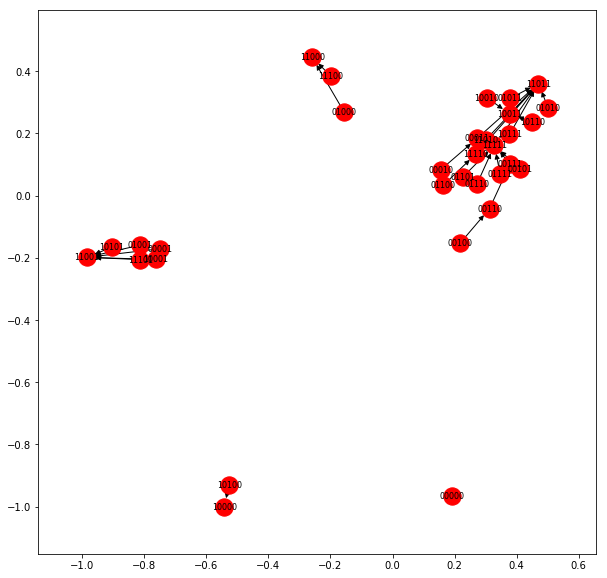

In [51]:
#transition state diagram
#https://stackoverflow.com/questions/20133479/how-to-draw-directed-graphs-using-networkx-in-python
G = nx.DiGraph()
G.add_edges_from(transitions)

pos = nx.spring_layout(G)
plt.figure(3,figsize=(10,10)) 
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos,font_size=8)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()